<a href="https://colab.research.google.com/github/saipallavi-hub/Aiml-2025/blob/main/AIML_ASS_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car' ,
                        version=2,
                        parser='auto')


In [ ]:
type(car_data)

sklearn.utils._bunch.Bunch

In [ ]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
df = car_data.frame
df.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
df.shape

(1728, 7)

In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,2
top,high,high,2,2,big,high,P
freq,432,432,432,576,576,576,1210


In [ ]:
df.isna().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


Exploratory Data Analysis

<ipython-input-10-89f395d12335>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='buying',


<Axes: xlabel='buying', ylabel='count'>

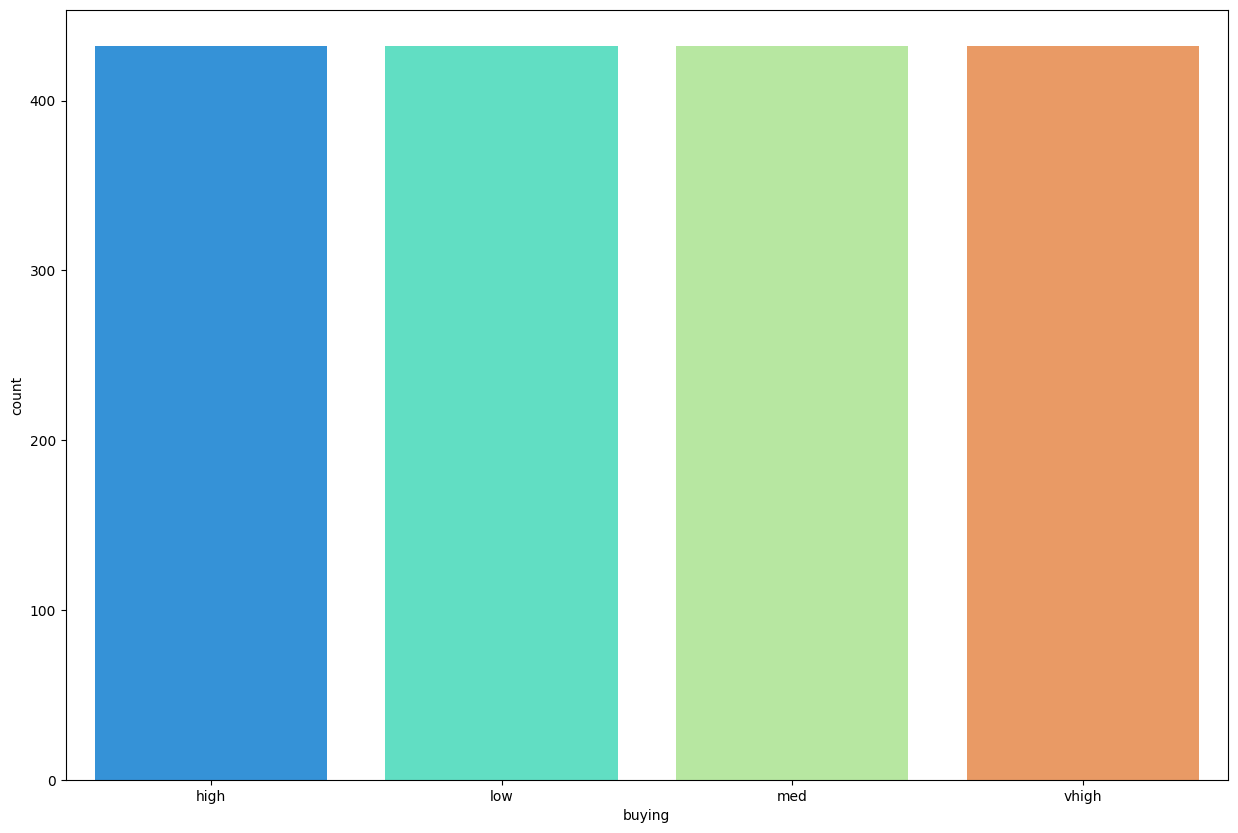

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='buying',
              palette = 'rainbow')


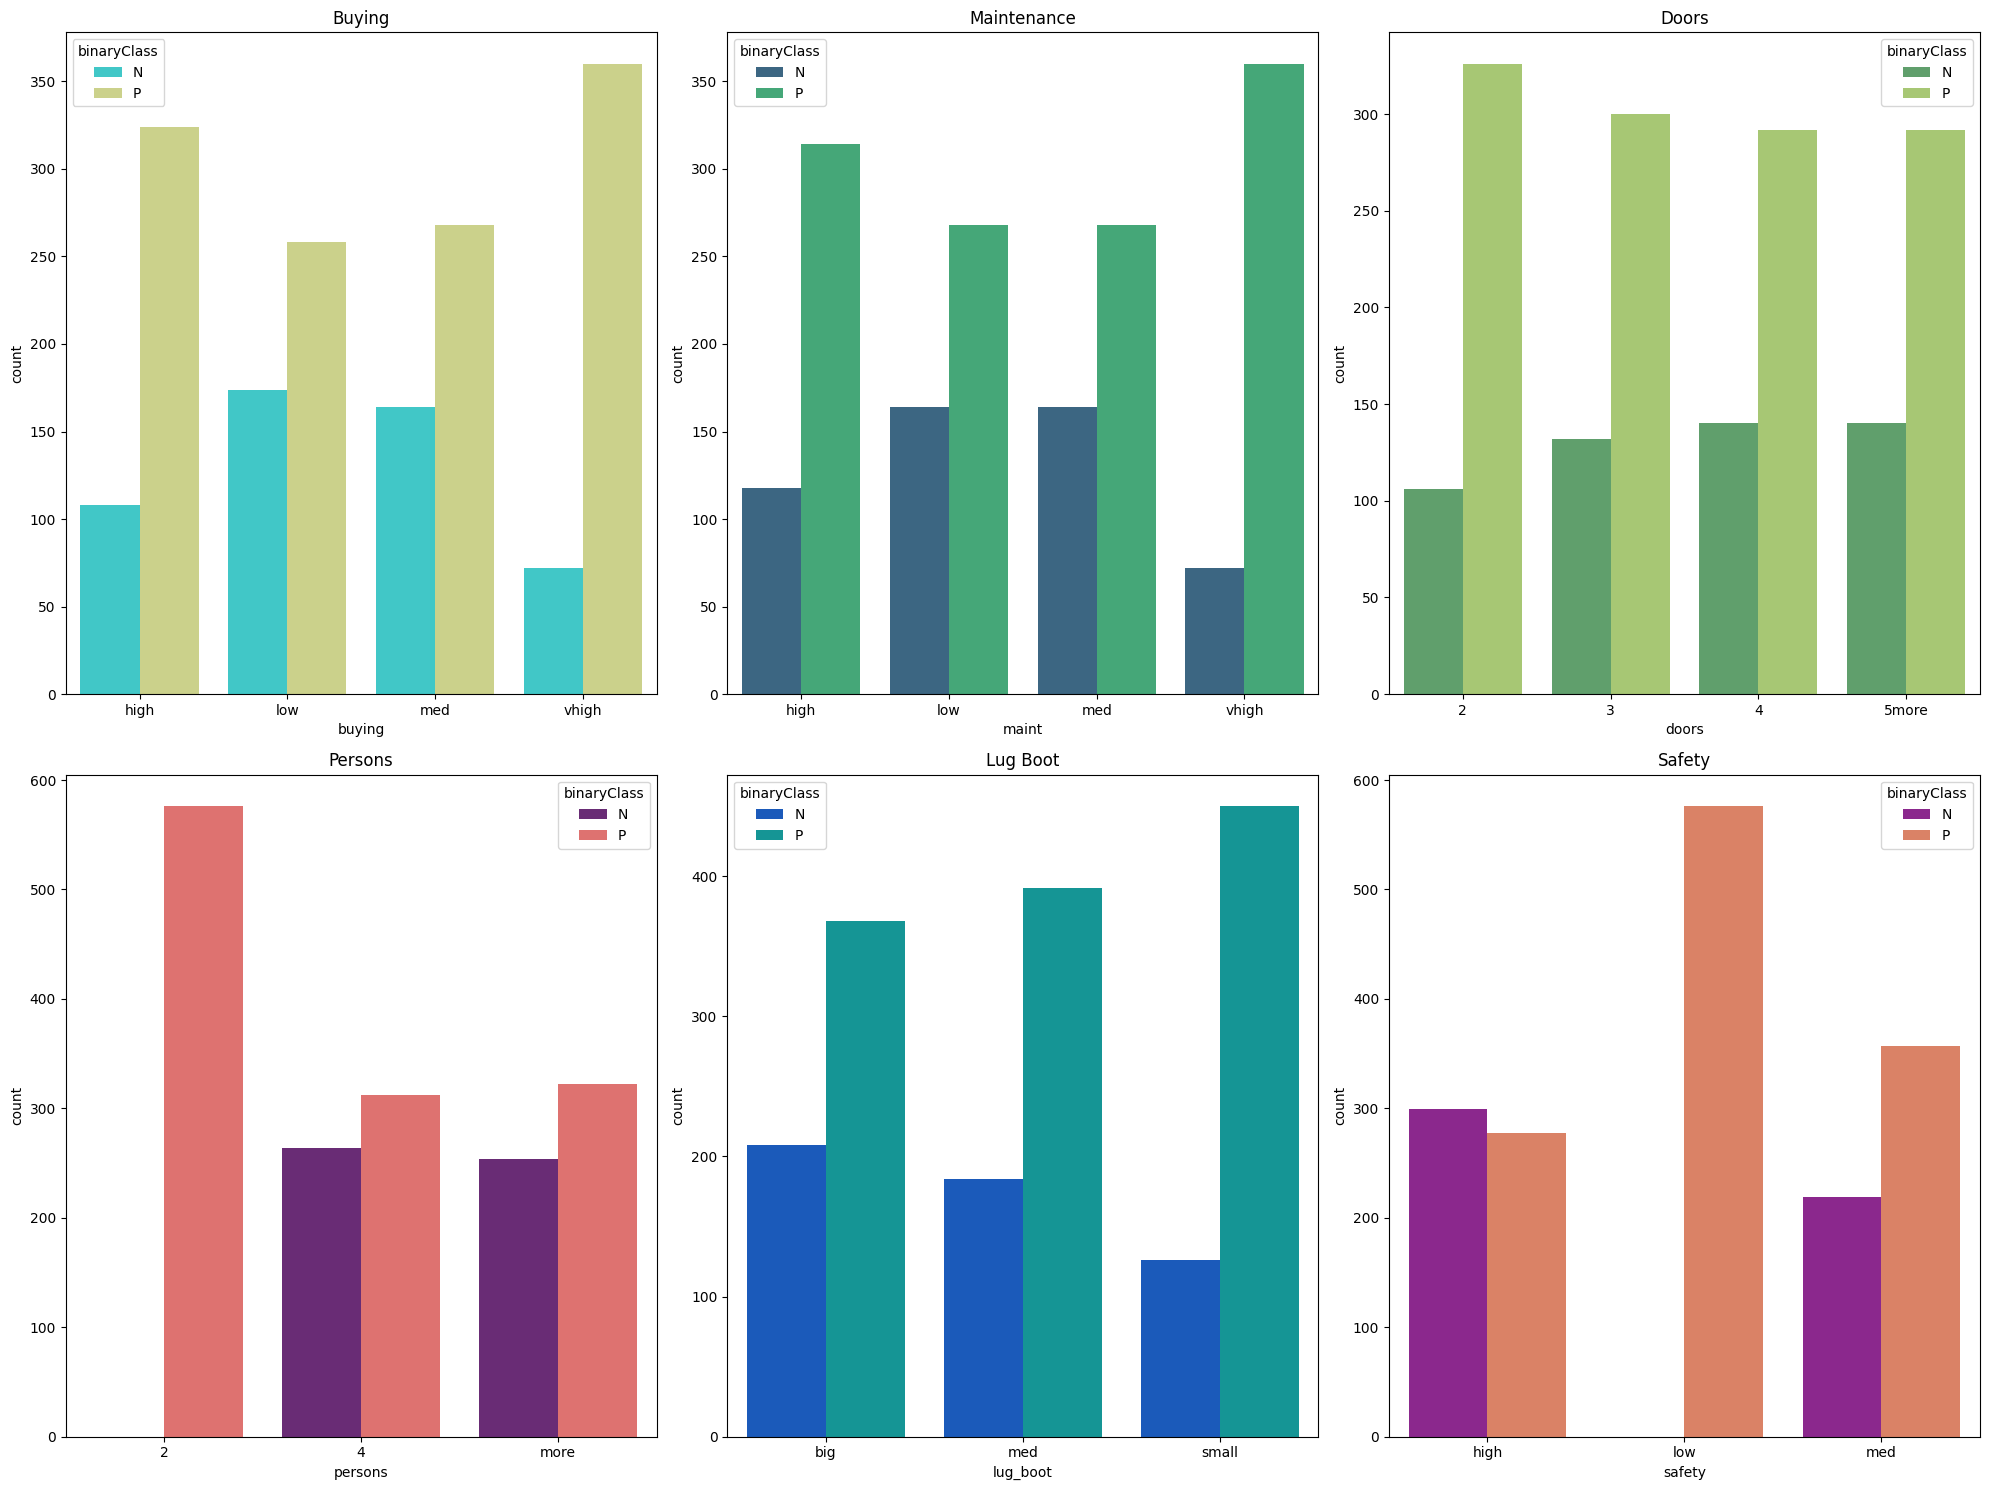

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(20,15))
sns.countplot(ax=axes[0,0],data=df,x='buying',hue='binaryClass',palette='rainbow')
axes[0,0].set_title('Buying')
sns.countplot(ax=axes[0,1],data=df,x='maint',hue='binaryClass',palette='viridis')
axes[0,1].set_title('Maintenance')
sns.countplot(ax=axes[0,2],data=df,x='doors',hue='binaryClass',palette='summer')
axes[0,2].set_title('Doors')
sns.countplot(ax=axes[1,0],data=df,x='persons',hue='binaryClass',palette='magma')
axes[1,0].set_title('Persons')
sns.countplot(ax=axes[1,1],data=df,x='lug_boot',hue='binaryClass',palette='winter')
axes[1,1].set_title('Lug Boot')
sns.countplot(ax=axes[1,2],data=df,x='safety',hue='binaryClass',palette='plasma')
axes[1,2].set_title('Safety')
plt.tight_layout()
plt.show()

Feature Engineering-Scaling

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   buying       1728 non-null   category
 1   maint        1728 non-null   category
 2   doors        1728 non-null   category
 3   persons      1728 non-null   category
 4   lug_boot     1728 non-null   category
 5   safety       1728 non-null   category
 6   binaryClass  1728 non-null   category
dtypes: category(7)
memory usage: 13.0 KB


In [ ]:
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,3,3,0,0,2,1,1
1,3,3,0,0,2,2,1
2,3,3,0,0,2,0,1
3,3,3,0,0,1,1,1
4,3,3,0,0,1,2,1


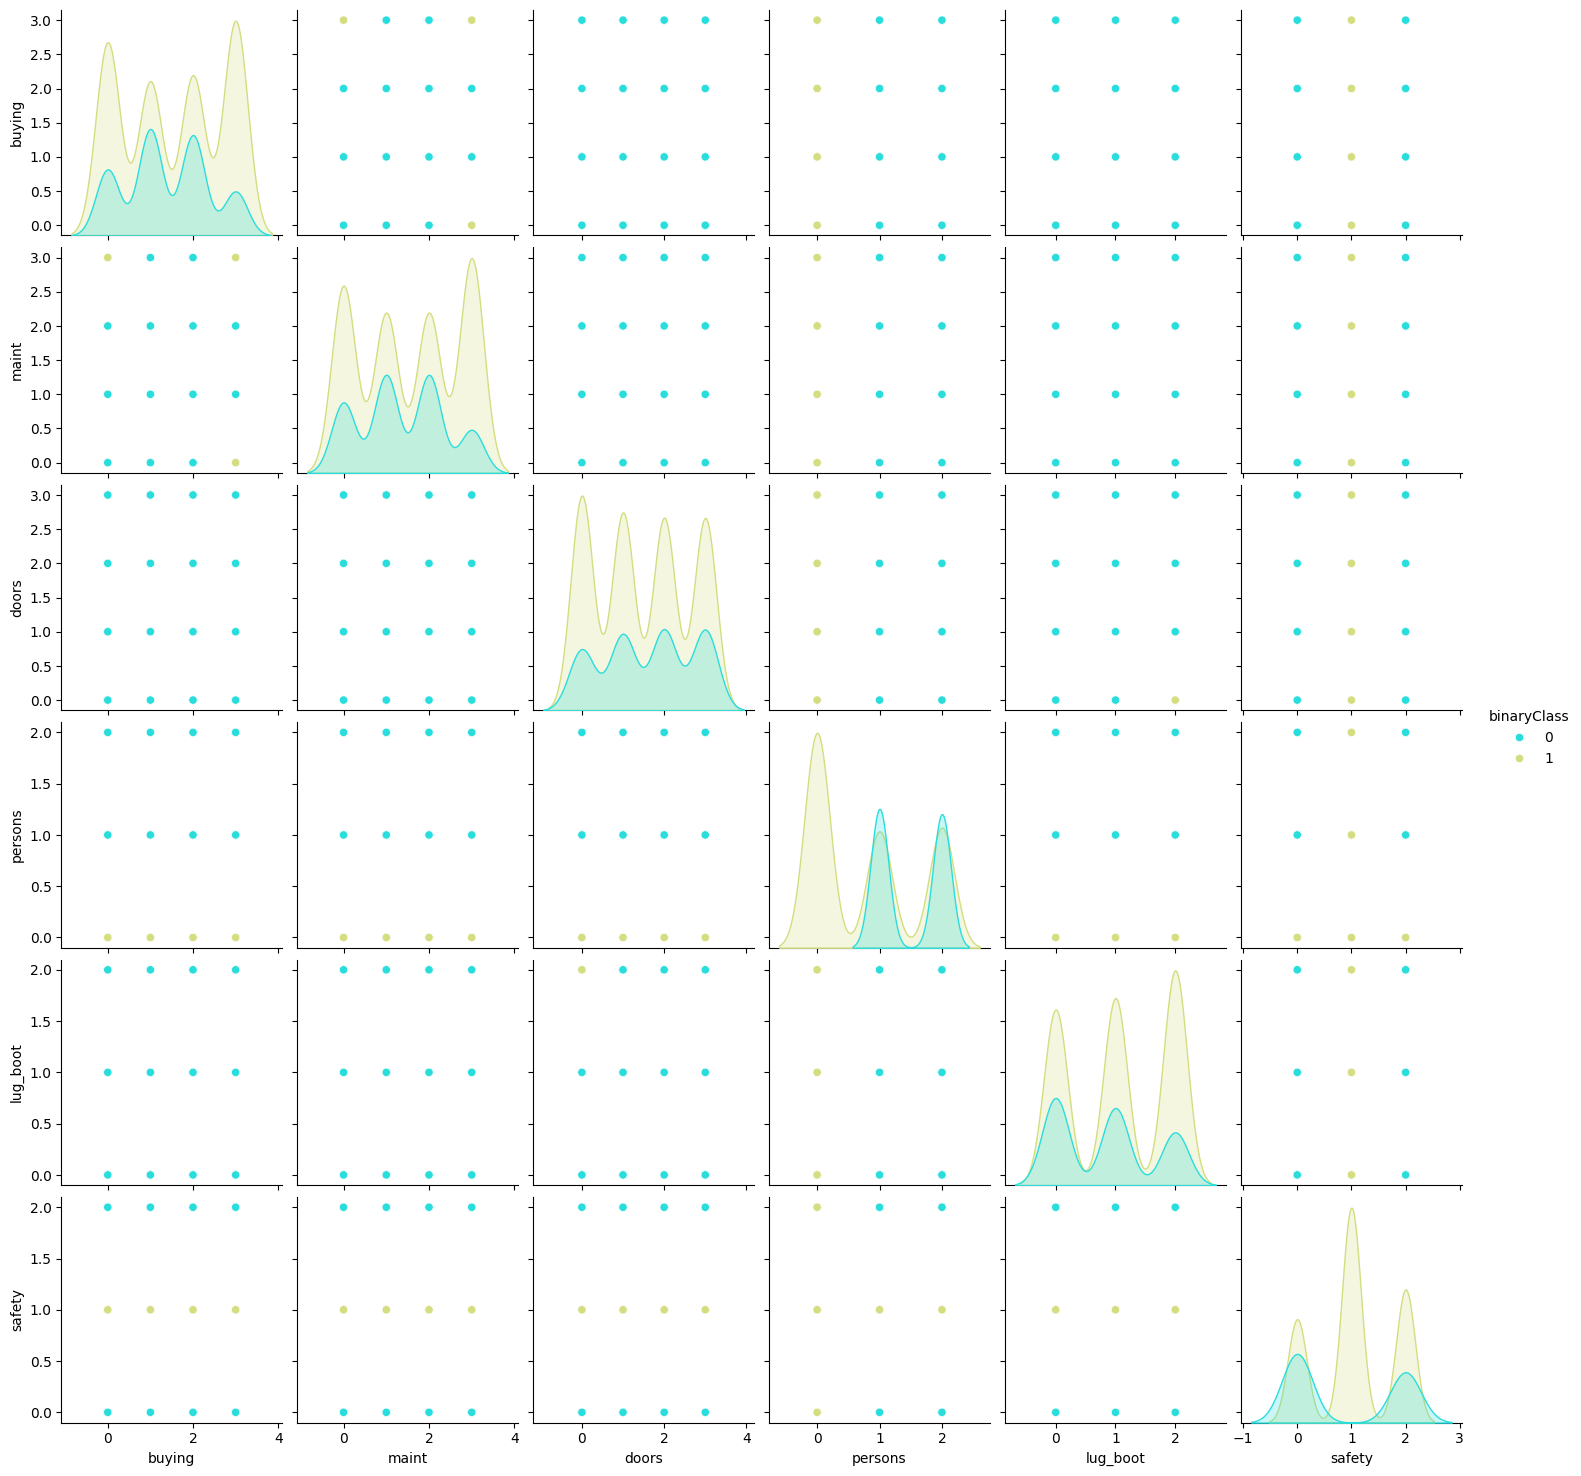

In [ ]:
sns.pairplot(df,hue='binaryClass', palette='rainbow')

Splitting Data Set


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(labels = ['binaryClass'],axis = 1)
y = df['binaryClass']

In [ ]:
x.shape

(1728, 6)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape,x_test.shape)

(1382, 6) (346, 6)


Model Building- Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
dt = DecisionTreeClassifier(criterion ="gini")
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
class_names = df['binaryClass'].astype(str).values.tolist()

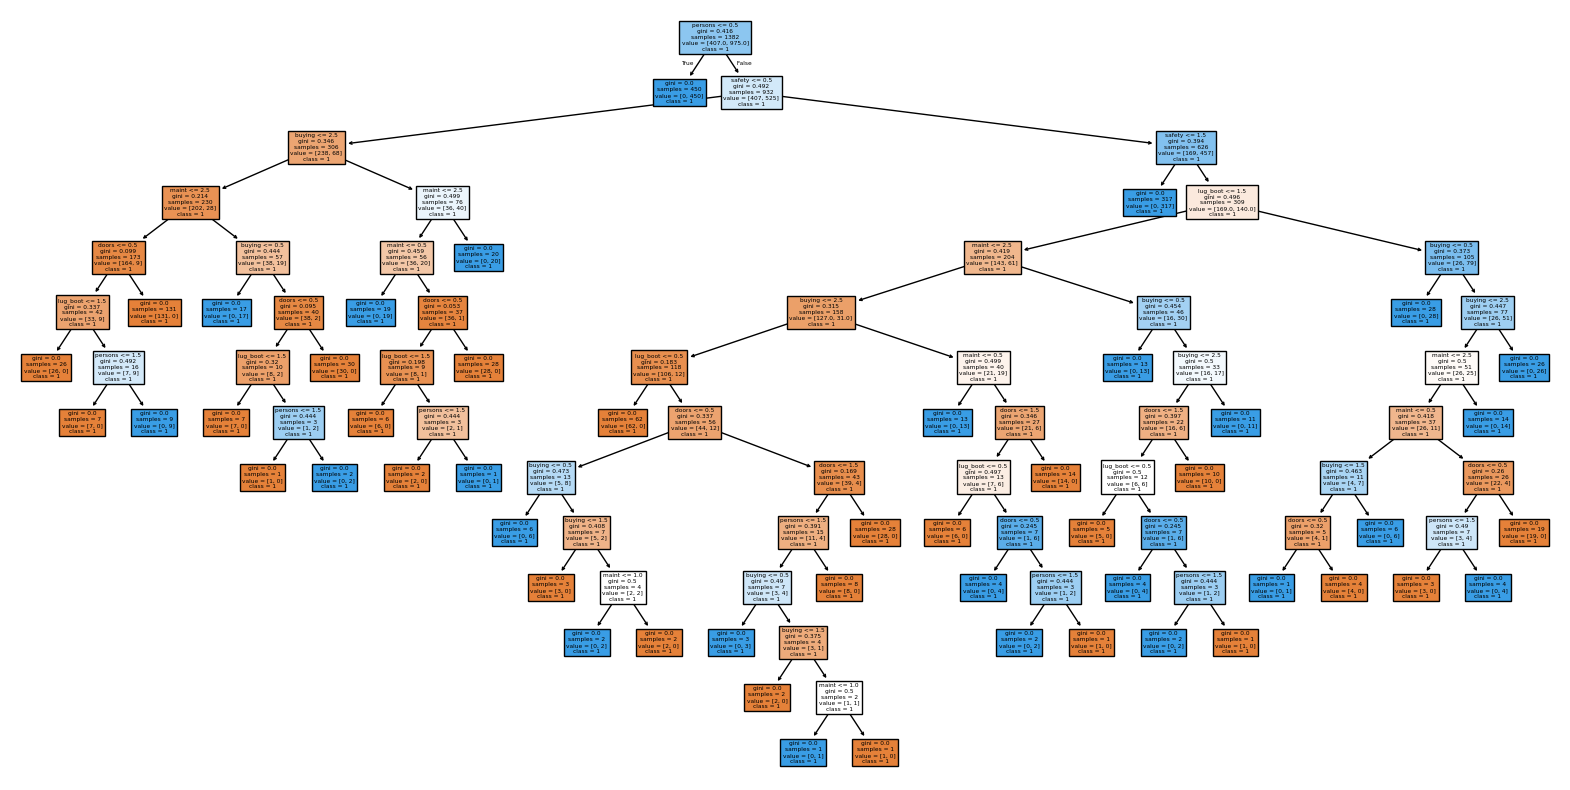

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=car_data.feature_names, class_names=class_names)
plt.show()

In [ ]:
y_train_predicted = dt.predict(x_train)
y_test_predicted = dt.predict(x_test)

Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
print("training accuracy =", accuracy_score(y_train,y_train_predicted))
print("testing accuracy =",accuracy_score(y_test,y_test_predicted))

training accuracy = 1.0
testing accuracy = 0.9884393063583815


In [ ]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       111
           1       0.98      1.00      0.99       235

    accuracy                           0.99       346
   macro avg       0.99      0.98      0.99       346
weighted avg       0.99      0.99      0.99       346



In [ ]:
cm = confusion_matrix(y_test,y_test_predicted)
cm

array([[107,   4],
       [  0, 235]])

Hyper Parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_grid = {'max_Leaf_nodes': list(range(0, 6)), 'min_samples_split': [0,1,2,3,4], 'min_samples_leaf':[0,1,2,3,4],
               'max_depth':[0,1,2,3,4,5], 'max_features':[0,1,2,3,4,5], 'max_leaf_nodes':[0,1,2,3,4,5]}

In [ ]:
gd = GridSearchCV(DecisionTreeClassifier(random_state=42,
                    class_weight='balanced'), params_grid,
                  verbose=1,
                  cv=3, refit=True)
gd.fit(x_train, y_train)

Fitting 3 folds for each of 32400 candidates, totalling 97200 fits


ValueError: Invalid parameter 'max_Leaf_nodes' for estimator DecisionTreeClassifier(class_weight='balanced', random_state=42). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'].

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params_grid = {'max_leaf_nodes': list(range(2, 6)), 'min_samples_split': [2,3,4], 'min_samples_leaf':[1,2,3,4],
               'max_depth':[1,2,3,4,5], 'max_features':[1,2,3,4], 'max_leaf_nodes':[2,3,4,5]}

gd = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params_grid, verbose=1, cv=3, refit=True)
gd.fit(x_train, y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'max_leaf_nodes': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)